In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_seq_items', None)

In [3]:
df_hhv1_2324 = pd.read_stata("data/23-24/hhv1.dta")
df_perv1_2324 = pd.read_stata("data/23-24/perv1.dta")

In [4]:
df_hhv1_2324.columns

Index(['FI_hhv1', 'B1q2_hhv1', 'qtr_hhv1', 'visit_hhv1', 'b1q3_hhv1',
       'state_hhv1', 'distcode_hhv1', 'nss_region_hhv1', 'b1q5_hhv1',
       'b1q6_hhv1', 'b1q11_hhv1', 'b1q12_hhv1', 'b1q1_hhv1', 'b1q13_hhv1',
       'b1q14_hhv1', 'b1q15_hhv1', 'b1q9_hhv1', 'b1q17_hhv1', 'b1q18_hhv1',
       'b1q19_hhv1', 'b3q1_hhv1', 'b3q2_hhv1', 'b3q3_hhv1', 'b3q4_hhv1',
       'b3q5pt1_hhv1', 'b3q5pt2_hhv1', 'b3q5pt3_hhv1', 'b3q5pt4_hhv1',
       'b3q5pt5_hhv1', 'b3q5pt6_hhv1', 'b1q16_hhv1', 'b2q2i_hhv1', 'b2q4_hhv1',
       'nss_hhv1', 'nsc_hhv1', 'mult_hhv1', 'no_qtr_hhv1'],
      dtype='object')

In [ ]:
import pandas as pd

def auto_rename_from_layout(data_path, layout_excel_path, sheet_name):
    print(f"--- Processing: {sheet_name} ---")
    
    df = pd.read_stata(data_path)
    print(f"Data Loaded: {len(df.columns)} columns")
    
    layout = pd.read_excel(layout_excel_path, sheet_name=sheet_name)
    
    target_col = 'Field_Name' 
    
    if target_col not in layout.columns:
        print(f"⚠️ ERROR: Could not find column '{target_col}' in the Excel sheet.")
        print(f"Found columns: {layout.columns.tolist()}")
        return df

    # Clean the list (Remove empty rows if any)
    valid_names = layout[target_col].dropna().astype(str).str.strip().tolist()
    
    if len(df.columns) != len(valid_names):
        print(f"⚠️ LENGTH MISMATCH: Data has {len(df.columns)} cols, Layout has {len(valid_names)} names.")
        print("Stopping to prevent wrong mapping.")
        return df
    
    rename_map = dict(zip(df.columns, valid_names))
    df_clean = df.rename(columns=rename_map)
    
    print("✅ Success! Sample Mapping:")
    keys = list(rename_map.keys())
    for i in [0, 1, 12]: 
        if i < len(keys):
            print(f"  Col {i}: {keys[i]} -> {rename_map[keys[i]]}")
            
    return df_clean

In [9]:
df_hhv1_2324 = auto_rename_from_layout("data/23-24/hhv1.dta", "manuals/Data_LayoutPLFS_2023-24.xlsx", "hhv1")
df_perv1_2324 = auto_rename_from_layout("data/23-24/perv1.dta", "manuals/Data_LayoutPLFS_2023-24.xlsx", "perv1")

--- Processing: hhv1 ---
Data Loaded: 37 columns
✅ Success! Sample Mapping:
  Col 0: FI_hhv1 -> file_id
  Col 1: B1q2_hhv1 -> sch
  Col 12: b1q1_hhv1 -> mfsu
--- Processing: perv1 ---
Data Loaded: 139 columns
✅ Success! Sample Mapping:
  Col 0: FI_perv1 -> file_id
  Col 1: B1q2_perv1 -> sch
  Col 12: b1q1_perv1 -> mfsu


In [10]:
df_hhv1_2324.columns

Index(['file_id', 'sch', 'qtr', 'visit', 'sec', 'st', 'dc', 'nss_reg', 'strm',
       'sstrm', 'ss', 'sro', 'mfsu', 'seg', 'sss', 'ssu', 'smonth',
       'resp_code', 'svc', 'rea_sub', 'hh_size', 'hhtype', 'relg', 'sg',
       'hce1', 'hce2', 'hce3', 'hce4', 'hce5', 'hce_tot', 'inf_srl',
       'sur_date', 'sur_time', 'nss', 'nsc', 'mult', 'no_qtr'],
      dtype='object')

In [11]:
df_perv1_2324.columns

Index(['file_id', 'sch', 'qtr', 'visit', 'sec', 'st', 'dc', 'nss_reg', 'strm',
       'sstrm', 'ss', 'sro', 'mfsu', 'seg', 'sss', 'ssu', 'srl', 'rel', 'sex',
       'age', 'marst', 'gedu_lvl', 'tedu_lvl', 'form_edu', 'curr_att', 'voc',
       'voc_compl', 'voc_fld', 'voc_dur', 'voc_typ', 'voc_fund', 'pas',
       'ind_pas', 'ocu_pas', 'has_sas', 'loc_pas', 'etyp_pas', 'wrkr_pas',
       'job_pas', 'leave_pas', 'ssec_pas', 'ecoprd_pas', 'sas', 'ind_sas',
       'ocu_sas', 'loc_sas', 'etyp_sas', 'wrkr_sas', 'job_sas', 'leave_sas',
       'ssec_sas', 'ecoprd_sas', 'wrk_365', 'dur_pas', 'dur_sas', 'eff_pas',
       'dur_unp', 'evr_wrk', 'rea_nw', 'rea', 'das17', 'ind17', 'hr17',
       'ern17', 'das27', 'ind27', 'hr27', 'ern27', 'hr7', 'ahr7', 'das16',
       'ind16', 'hr16', 'ern16', 'das26', 'ind26', 'hr26', 'ern26', 'hr6',
       'ahr6', 'das15', 'ind15', 'hr15', 'ern15', 'das25', 'ind25', 'hr25',
       'ern25', 'hr5', 'ahr5', 'das14', 'ind14', 'hr14', 'ern14', 'das24',
       'ind24',

In [13]:
import pandas as pd

# ==========================================
# 1. DEFINE COLUMN GROUPS (The "Menu")
# ==========================================

# --- KEYS ---
# Must exist in both files to join them
keys_cols = ['mfsu', 'sec', 'ssu', 'visit', 'seg', 'sss']

# --- HOUSEHOLD GROUPS ---
hh_geo_cols     = ['st', 'dc']              # State, District
hh_social_cols  = ['relg', 'sg']            # Religion, Caste
hh_econ_cols    = ['hh_size', 'hhtype', 'hce_tot', 'mult'] # Size, Type, Wealth(MPCE), Weight

# --- PERSON GROUPS ---
# 1. Demographics
per_id_cols     = ['rel', 'sex', 'age', 'marst']

# 2. Education (The Group you noticed)
per_edu_cols    = [
    'gedu_lvl',   # General Education Level (PhD, Graduate, etc.)
    'tedu_lvl',   # Technical Education (Vocational training)
    'form_edu'    # No. of years in formal education
]

# 3. Work Description (Job Type)
per_job_cols    = [
    'pas',        # Principal Activity Status (The main "Employed?" code)
    'ind_pas',    # Industry (NIC Code - IT vs Farming)
    'ocu_pas'     # Occupation (NCO Code - Manager vs Clerk)
]

# 4. Wages & Earnings (The Dependent Variables)
per_wage_cols   = [
    'ern_reg',    # Earnings from Regular Wage/Salaried work
    'ern_self',   # Earnings from Self-Employment
    'mult'        # Person Weight
]

# ==========================================
# 2. FILTER & MERGE
# ==========================================

# Combine lists
final_hh_cols  = keys_cols + hh_geo_cols + hh_social_cols + hh_econ_cols
final_per_cols = keys_cols + per_id_cols + per_edu_cols + per_job_cols + per_wage_cols

# Select (Safety check: ignore if column missing to prevent crash)
df_hh_clean = df_hhv1_2324[[c for c in final_hh_cols if c in df_hhv1_2324.columns]]
df_per_clean = df_perv1_2324[[c for c in final_per_cols if c in df_perv1_2324.columns]]

# Merge (Left Join: Keep every person, attach their household info)
# Converting keys to string first ensures no 'int' vs 'object' mismatches
for k in keys_cols:
    if k in df_hh_clean.columns and k in df_per_clean.columns:
        df_hh_clean.loc[:, k] = df_hh_clean[k].astype(str)
        df_per_clean.loc[:, k] = df_per_clean[k].astype(str)

df_master = pd.merge(
    df_per_clean,
    df_hh_clean,
    on=keys_cols,
    how='left',
    validate='m:1'
)

print(f"Dataset Ready. Shape: {df_master.shape}")
print("Columns:", df_master.columns.tolist())

Dataset Ready. Shape: (418159, 27)
Columns: ['mfsu', 'sec', 'ssu', 'visit', 'seg', 'sss', 'rel', 'sex', 'age', 'marst', 'gedu_lvl', 'tedu_lvl', 'form_edu', 'pas', 'ind_pas', 'ocu_pas', 'ern_reg', 'ern_self', 'mult_x', 'st', 'dc', 'relg', 'sg', 'hh_size', 'hhtype', 'hce_tot', 'mult_y']


In [14]:
df_master.columns

Index(['mfsu', 'sec', 'ssu', 'visit', 'seg', 'sss', 'rel', 'sex', 'age',
       'marst', 'gedu_lvl', 'tedu_lvl', 'form_edu', 'pas', 'ind_pas',
       'ocu_pas', 'ern_reg', 'ern_self', 'mult_x', 'st', 'dc', 'relg', 'sg',
       'hh_size', 'hhtype', 'hce_tot', 'mult_y'],
      dtype='object')

In [15]:
df_master.head()

,mfsu,sec,ssu,visit,seg,sss,rel,sex,age,marst,...,ern_self,mult_x,st,dc,relg,sg,hh_size,hhtype,hce_tot,mult_y
0,10002,1,01,V1,1,1,1,1,72,2,...,0,246798,02,04,1,2,7,1,8733,246798
1,10002,1,01,V1,1,1,2,2,65,2,...,0,246798,02,04,1,2,7,1,8733,246798
2,10002,1,01,V1,1,1,3,1,40,2,...,6500,246798,02,04,1,2,7,1,8733,246798
3,10002,1,01,V1,1,1,4,2,35,2,...,0,246798,02,04,1,2,7,1,8733,246798
4,10002,1,01,V1,1,1,6,1,15,1,...,0,246798,02,04,1,2,7,1,8733,246798


In [16]:
df_master['pas'].unique()

array(['94', '93', '11', '21', '91', '31', '99', '51', '81', '92', '95',
       '97', '12', '41'], dtype=object)

In [17]:
import numpy as np

# Create a copy to avoid SettingWithCopy warnings
df = df_master.copy()

# ==========================================
# 1. FIX WEIGHTS
# ==========================================
# PLFS weights (mult) are usually scaled by 100.
# mult_x = Person Weight, mult_y = Household Weight
df['weight'] = df['mult_x'] / 100

# ==========================================
# 2. CREATE ECONOMIC VARIABLES
# ==========================================

# A. MPCE (Wealth Proxy)
# hce_tot = Household Consumer Expenditure Total
# hh_size = Household Size
df['mpce'] = df['hce_tot'] / df['hh_size']

# B. Wage (Combine Regular + Self Employed)
# Fill NaNs with 0 for calculation, but be careful in analysis (0 wage != unemployed)
df['total_wage'] = df['ern_reg'].fillna(0) + df['ern_self'].fillna(0)

# ==========================================
# 3. DEFINE LABOR STATUS (The Dependent Var)
# ==========================================
# Official PLFS Codes:
# 11-51: Employed
# 81-82: Unemployed (Seeking work)
# 91-97: Out of Labor Force (Student, Rentier, Domestic Duties)

# Convert to Numeric just in case
df['pas'] = pd.to_numeric(df['pas'], errors='coerce')

# Create Flags
df['is_employed'] = df['pas'].between(11, 51).astype(int)
df['is_unemployed'] = df['pas'].between(81, 82).astype(int)

# Your Special Variable: "Demand for Non-Market Time"
# Code 92: Domestic duties only
# Code 93: Domestic duties + free collection of goods
df['is_domestic_duties'] = df['pas'].isin([92, 93]).astype(int)

# ==========================================
# 4. FILTER TARGET POPULATION
# ==========================================
# Criteria: Urban (sec=2) + Female (sex=2) + Married (marst=2) + Working Age (15-60)

# Convert columns to numeric for filtering
cols_to_numeric = ['sec', 'sex', 'marst', 'age']
for c in cols_to_numeric:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# create the subset
df_target = df[
    (df['sec'] == 2) &           # Urban
    (df['sex'] == 2) &           # Female
    (df['marst'] == 2) &         # Married
    (df['age'].between(15, 60))  # Working Age
].copy()

print(f"Original Size: {len(df)}")
print(f"Target Population (Urban Married Women 15-60): {len(df_target)}")
print("Columns Added: 'mpce', 'total_wage', 'is_employed', 'is_domestic_duties'")

Original Size: 418159
Target Population (Urban Married Women 15-60): 40083
Columns Added: 'mpce', 'total_wage', 'is_employed', 'is_domestic_duties'


In [21]:
# ==========================================
# 5. FIXED SPOUSAL WAGE LOGIC
# ==========================================

# 1. Clean Data Types (CRITICAL FIX)
# We ensure these columns are integers, handling any '1 ' or ' 1' formatting
cols_to_fix = ['rel', 'sex', 'marst', 'total_wage']
for c in cols_to_fix:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2. Re-create the Husbands Dataframe
df_men = df[
    (df['sex'] == 1) &           # Male
    (df['marst'] == 2) &         # Married
    (df['rel'].isin([1, 2]))     # Head (1) or Spouse (2)
].copy()

print(f"Number of Husbands Found: {len(df_men)}") 
# ^ If this is 0, we still have a problem. If > 0, we are good.

# 3. Prepare for Merge
# We only need the keys and the wage
spouse_cols = keys_cols + ['total_wage']
df_husbands = df_men[spouse_cols].rename(columns={'total_wage': 'spousal_wage'})

# 4. Handle Joint Families (Duplicates)
# If a house has 2 married men (Father + Son), we keep the higher earner to be safe
# (Ideally we match Head-to-Spouse, but this is a robust proxy)
df_husbands = df_husbands.sort_values('spousal_wage', ascending=False).drop_duplicates(subset=keys_cols)

# 5. Merge Back to Target Women
# Ensure keys are strings in both to avoid merge failure
for k in keys_cols:
    df_target[k] = df_target[k].astype(str)
    df_husbands[k] = df_husbands[k].astype(str)

df_target_final = pd.merge(
    df_target,
    df_husbands,
    on=keys_cols,
    how='left'
)

# 6. Fill Zeros
df_target_final['spousal_wage'] = df_target_final['spousal_wage'].fillna(0)

# CHECK THE RESULT
print("Unique Spousal Wages (First 10):")
print(df_target_final['spousal_wage'].unique()[:10])

Number of Husbands Found: 77878
Unique Spousal Wages (First 10):
[15200.     0. 22250.  7500.  5500.  9800.  6500.  3500. 50000.  6100.]


In [22]:
# ==========================================
# 6. SUMMARY STATISTICS (The Report Table)
# ==========================================

# Define your key analysis variables
vars_to_summarize = [
    'age', 
    'hh_size', 
    'mpce',             # Wealth
    'total_wage',       # Own Wage
    'spousal_wage',     # Husband's Wage
    'is_employed',      # Outcome 1 (Work)
    'is_domestic_duties'# Outcome 2 (Home)
]

# Generate Mean and Std Dev
summary_table = df_target_final[vars_to_summarize].describe().T[['mean', 'std', 'min', 'max']]
print("\n--- DESCRIPTIVE STATISTICS (Urban Married Women) ---")
print(summary_table)

# Quick Correlation Check (Do Wages negatively affect Participation?)
print("\n--- CORRELATION MATRIX ---")
print(df_target_final[['is_employed', 'total_wage', 'spousal_wage', 'mpce']].corr())


--- DESCRIPTIVE STATISTICS (Urban Married Women) ---
                            mean           std     min       max
age                    39.033555     10.391755    15.0      60.0
hh_size                 4.806227      2.123536     1.0      26.0
mpce                 4079.620141   2678.422739   588.5   45466.5
total_wage           3378.674800  11174.027180  -750.0  320000.0
spousal_wage        17019.876007  21971.609560 -6500.0  400000.0
is_employed             0.256368      0.436633     0.0       1.0
is_domestic_duties      0.710675      0.453455     0.0       1.0

--- CORRELATION MATRIX ---
              is_employed  total_wage  spousal_wage      mpce
is_employed      1.000000    0.500955     -0.034490  0.065169
total_wage       0.500955    1.000000      0.153814  0.301120
spousal_wage    -0.034490    0.153814      1.000000  0.436590
mpce             0.065169    0.301120      0.436590  1.000000


In [23]:
df_target_final['spousal_wage'].unique()

array([15200.,     0., 22250., ..., 37405., 38680., 44498.], shape=(1384,))

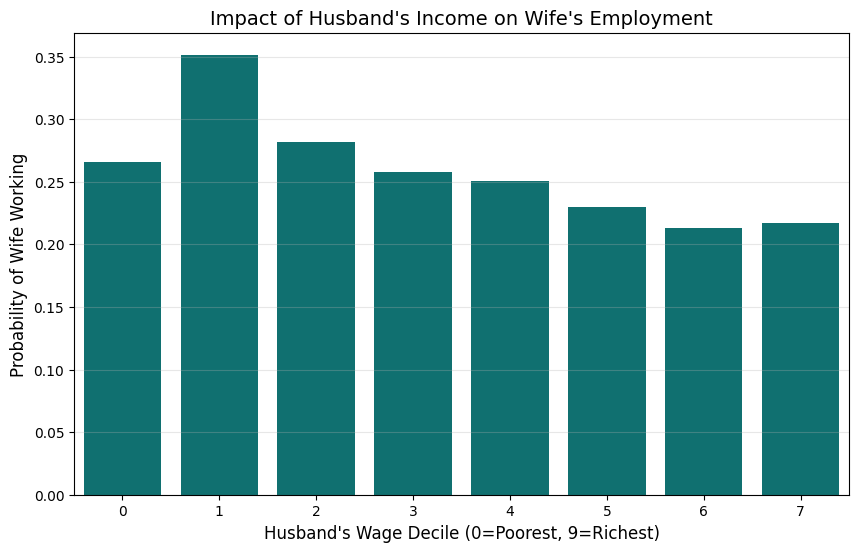

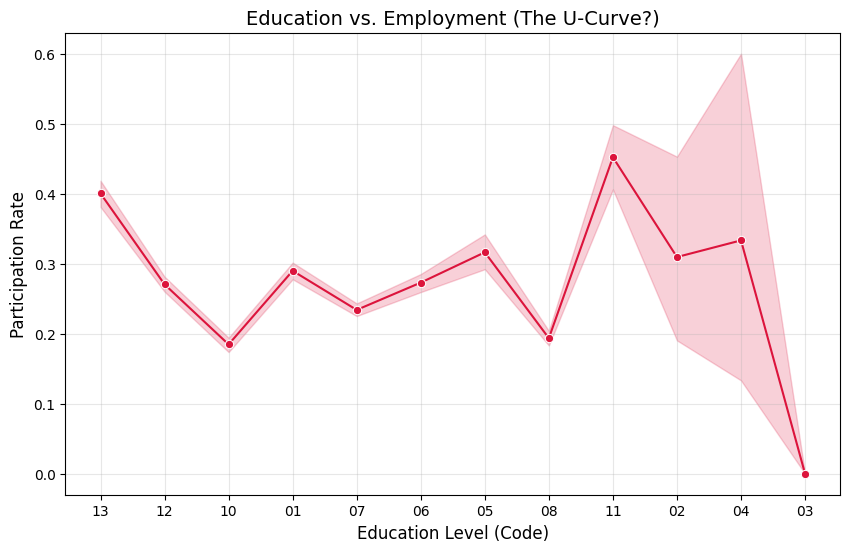

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create meaningful groups for plotting
df_target_final['spouse_wage_decile'] = pd.qcut(df_target_final['spousal_wage'], q=10, labels=False, duplicates='drop')

# ----------------------------------------------
# CHART 1: The "Income Effect" (Husband's Wage)
# ----------------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='spouse_wage_decile', y='is_employed', data=df_target_final, errorbar=None, color='teal')
plt.title("Impact of Husband's Income on Wife's Employment", fontsize=14)
plt.xlabel("Husband's Wage Decile (0=Poorest, 9=Richest)", fontsize=12)
plt.ylabel("Probability of Wife Working", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# ----------------------------------------------
# CHART 2: The "Education U-Curve"
# ----------------------------------------------
# Map codes to names for readability (Check your specific codes in layout!)
# Assuming: 1=Not literate, ... 10-12=Secondary, 13=Graduate+ (Adjust based on your data)
# For now, we plot the raw codes to see the shape
plt.figure(figsize=(10, 6))
sns.lineplot(x='gedu_lvl', y='is_employed', data=df_target_final, marker='o', color='crimson')
plt.title("Education vs. Employment (The U-Curve?)", fontsize=14)
plt.xlabel("Education Level (Code)", fontsize=12)
plt.ylabel("Participation Rate", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Prepare Variables
# Log-transform wages/wealth to handle huge outliers (standard econ practice)
# We add +1 to avoid log(0) errors
df_target_final['log_mpce'] = np.log(df_target_final['mpce'] + 1)
df_target_final['log_spousal_wage'] = np.log(df_target_final['spousal_wage'] + 1)

# 2. Define the Model Formula
# "Working depends on: Wealth + Husband's Wage + Education + Age + Family Size"
formula = """
is_employed ~ log_spousal_wage + log_mpce + C(gedu_lvl) + age + np.power(age, 2) + hh_size
"""

# 3. Run the Logit Model
model = smf.logit(formula=formula, data=df_target_final).fit()

# 4. Print the Results
print(model.summary())

/Users/kailorston/programming/python/PLFS-Analysis---LE-Assignment/.venv/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimization terminated successfully.
         Current function value: 0.543371
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:            is_employed   No. Observations:                40080
Model:                          Logit   Df Residuals:                    40063
Method:                           MLE   Df Model:                           16
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                 0.04536
Time:                        09:55:26   Log-Likelihood:                -21778.
converged:                       True   LL-Null:                       -22813.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.8546      0.296    -26.517      0.000      -8.435      -7.274
C(gedu_

In [29]:
# 1. Define the hypothetical women (Corrected Data Types)
hypothetical_data = pd.DataFrame({
    # We compare a husband earning 5k vs 50k
    'log_spousal_wage': [np.log(5000), np.log(50000)], 
    
    # Assume they have corresponding wealth (3k vs 10k monthly expenditure)
    'log_mpce': [np.log(3000), np.log(10000)],         
    
    # CRITICAL FIX: Use '10' as a string, because the model expects strings like '01', '02'...
    'gedu_lvl': ['10', '10'],  
    
    # Keep age and family size constant to isolate the income effect
    'age': [30, 30],                                   
    'hh_size': [4, 4]                                  
})

# 2. Predict Probability
probs = model.predict(hypothetical_data)

# 3. Output the result
print(f"Probability of working (Husband earns ₹5,000): {probs[0]*100:.2f}%")
print(f"Probability of working (Husband earns ₹50,000): {probs[1]*100:.2f}%")

# Calculate the 'Income Effect' drop
drop = (probs[0] - probs[1]) * 100
print(f"Result: A rich husband reduces the probability of working by {drop:.2f} percentage points.")

Probability of working (Husband earns ₹5,000): 16.79%
Probability of working (Husband earns ₹50,000): 18.77%
Result: A rich husband reduces the probability of working by -1.98 percentage points.


In [30]:
# HYPOTHETICAL: Same Lifestyle, Different Husband Income
hypothetical_data_fixed = pd.DataFrame({
    'log_spousal_wage': [np.log(5000), np.log(50000)], 
    'log_mpce': [np.log(5000), np.log(5000)],   # <--- FIXED LIFESTYLE
    'gedu_lvl': ['10', '10'], 
    'age': [30, 30],                                   
    'hh_size': [4, 4]                                  
})

# Predict
probs_fixed = model.predict(hypothetical_data_fixed)

print("--- Ceteris Paribus (Holding Lifestyle Constant) ---")
print(f"Prob (Husband 5k):  {probs_fixed[0]*100:.2f}%")
print(f"Prob (Husband 50k): {probs_fixed[1]*100:.2f}%")
print(f"Pure Income Effect: {(probs_fixed[1] - probs_fixed[0])*100:.2f} percentage points")

--- Ceteris Paribus (Holding Lifestyle Constant) ---
Prob (Husband 5k):  17.99%
Prob (Husband 50k): 17.10%
Pure Income Effect: -0.89 percentage points


Training Random Forest... (This might take 10-20 seconds)

Model Accuracy: 75.0%

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      5951
           1       0.66      0.06      0.11      2066

    accuracy                           0.75      8017
   macro avg       0.71      0.53      0.48      8017
weighted avg       0.73      0.75      0.66      8017



/var/folders/33/52rxg4rs0xq3cnjykvfcz36h0000gn/T/ipykernel_98687/1540665421.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


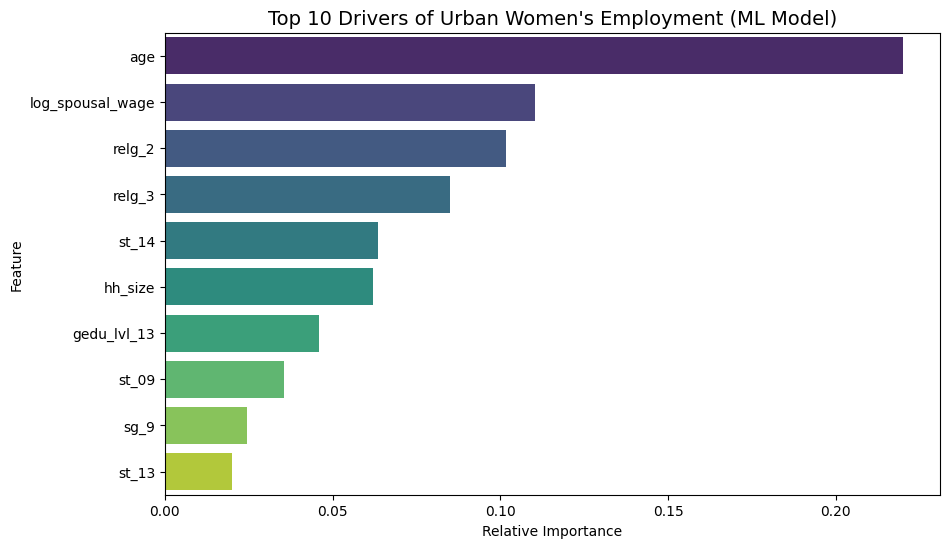

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Prepare Data for ML
# ML models need numbers, not strings. We convert categorical vars to "Dummy Variables"
# We drop 'log_mpce' to avoid the Reverse Causality cheating we just saw.
ml_features = ['log_spousal_wage', 'age', 'hh_size', 'gedu_lvl', 'relg', 'sg', 'st']
X = pd.get_dummies(df_target_final[ml_features], drop_first=True)
y = df_target_final['is_employed']

# 2. Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest (The "Black Box")
print("Training Random Forest... (This might take 10-20 seconds)")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Evaluate
y_pred = rf_model.predict(X_test)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 5. The Fun Part: Feature Importance Plot
# What actually drives the decision?
import pandas as pd
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Top 10 Drivers of Urban Women\'s Employment (ML Model)', fontsize=14)
plt.xlabel('Relative Importance')
plt.show()

/var/folders/33/52rxg4rs0xq3cnjykvfcz36h0000gn/T/ipykernel_98687/2762209339.py:65: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kailorston/programming/python/PLFS-Analysis---LE-Assignment/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


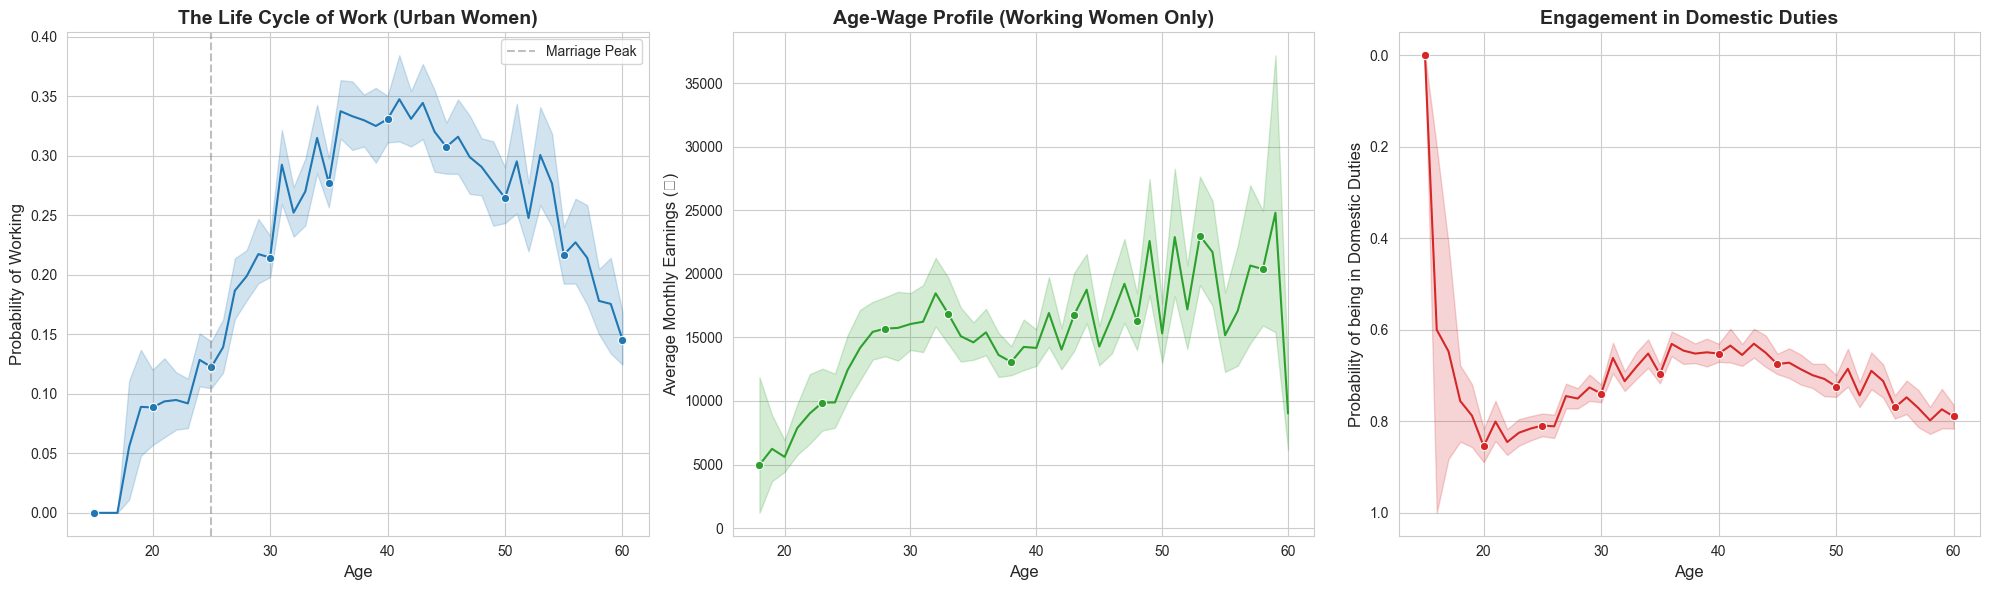

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_style("whitegrid")

# Create a figure with 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ---------------------------------------------------------
# PLOT 1: The "Inverted U" (Probability of Working)
# ---------------------------------------------------------
# We use lineplot which automatically calculates the Mean + Confidence Interval
sns.lineplot(
    x='age', 
    y='is_employed', 
    data=df_target_final, 
    ax=axes[0], 
    color='#1f77b4',  # Business Blue
    marker='o',
    markevery=5
)
axes[0].set_title("The Life Cycle of Work (Urban Women)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Probability of Working", fontsize=12)
axes[0].set_xlabel("Age", fontsize=12)
axes[0].axvline(x=25, color='gray', linestyle='--', alpha=0.5, label='Marriage Peak')
axes[0].legend()

# ---------------------------------------------------------
# PLOT 2: The "Wage Profile" (Income of Working Women)
# ---------------------------------------------------------
# Filter: Only look at women who actually have a wage (>0) to see career progression
working_women = df_target_final[df_target_final['total_wage'] > 0]

sns.lineplot(
    x='age', 
    y='total_wage', 
    data=working_women, 
    ax=axes[1], 
    color='#2ca02c',  # Money Green
    marker='o',
    markevery=5
)
axes[1].set_title("Age-Wage Profile (Working Women Only)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Average Monthly Earnings (₹)", fontsize=12)
axes[1].set_xlabel("Age", fontsize=12)

# ---------------------------------------------------------
# PLOT 3: The "Domestic Trap" (Domestic Duties)
# ---------------------------------------------------------
sns.lineplot(
    x='age', 
    y='is_domestic_duties', 
    data=df_target_final, 
    ax=axes[2], 
    color='#d62728',  # Warning Red
    marker='o',
    markevery=5
)
axes[2].set_title("Engagement in Domestic Duties", fontsize=14, fontweight='bold')
axes[2].set_ylabel("Probability of being in Domestic Duties", fontsize=12)
axes[2].set_xlabel("Age", fontsize=12)
axes[2].invert_yaxis() # Optional: Flip axis if you want "Up" to be "Good" (Less Duties)

plt.tight_layout()
plt.show()